
<img style="float: right;" src="data/logo.png" width= "200" height = "200">

# EART23202: Interpreting the Stratigraphic Record

### Exploring geological data with Python

___ 
#### Learning outcomes
* Load data into a Python workspace
* Plot data using Python packages
* Perform some statistical analysis on the data
___

#### Outline:
You have been in to the field and measured a conformable section of sedimentary rocks in the Peak District (the Sheffield Formation and the Manchester Formation). 

You have collected:

* Bed thickness data 
* Grain size data
* Paleocurrent data
* Structural data

You have also correlated your section with oxygen isotope data that someone else measured from the same section a few years ago (Hutton and Tharp, 2017). They only reported the data, and did not document the geology in detail.

You are back at home, and you want to:
1. inspect the data
2. plot the data
3. interpret the data
____

In [5]:
x = 1
y = 2
x + y

3

### 1) Inspect the data 
first we import the packages that we are going to use:

In [1]:
import numpy as np ## numbers
import pandas as pd ## tables
import matplotlib.pyplot as plt ## plotting
import seaborn as sns ## plotting
from scipy import stats ## statistics

%config InlineBackend.figure_formats = ['svg'] ## displaying data

then we load the data using one of those packages - Pandas (like Excel for Python):

In [2]:
log = pd.read_excel('data/data.xlsx')

now we want to check the data is loaded correctly:

In [3]:
log.describe()

,height,bed_number,bed_thickness,grainsize,paleocurrent,strike,dip,d18O
count,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,50.000000,100.000000
mean,452.274800,50.500000,16.183000,2.890000,258.530000,230.900000,35.180000,0.716300
std,491.713574,29.011492,13.850869,1.740167,117.877565,11.064283,3.884506,0.430118
min,0.750000,1.000000,-0.260000,0.000000,12.000000,209.000000,27.000000,0.090000
25%,64.952500,25.750000,3.355000,1.000000,160.000000,223.250000,32.000000,0.307500
50%,178.450000,50.500000,10.420000,3.000000,330.500000,229.500000,35.500000,0.640000
75%,779.412500,75.250000,28.872500,4.250000,358.000000,238.000000,38.000000,1.140000
max,1623.690000,100.000000,42.250000,6.000000,363.000000,260.000000,42.000000,1.400000


### 2) Plot the data

 Lets check how the bed thickness & grain size changes with height

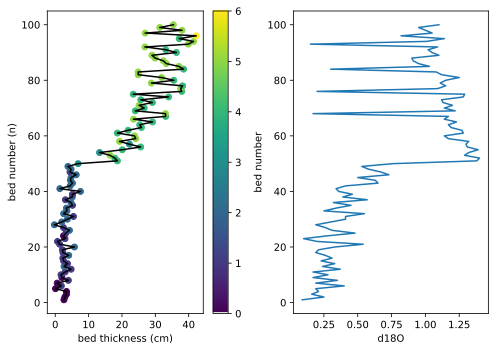

In [6]:
fig, ax = plt.subplots(figsize = (7, 5), ncols = 2)

ax[0].plot(log.bed_thickness, log.bed_number, 'k')
cax = ax[0].scatter(log.bed_thickness, log.bed_number, c = log.grainsize)
plt.colorbar(cax, ax = ax[0])

ax[1].plot(log.d18O, log.bed_number)

ax[0].set(xlabel = 'bed thickness (cm)', ylabel = 'bed number (n)')
ax[1].set(xlabel = 'd18O', ylabel = 'bed number')

plt.tight_layout()

# plt.savefig('field.jpg', dpi = 300)

It looks as though bed thickness is related to d18O, can this be quantified? 

### 3) Statistics

Let's check Spearman rank correlation and the R2 value

In [7]:
stats.spearmanr(log.bed_thickness, log.d18O)[0].round(2)

0.6

Interesting...now lets check if each formation is different

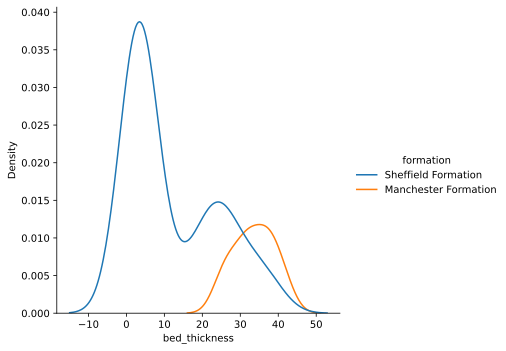

In [8]:
sns.displot(kind = 'kde', data = log, x = log.bed_thickness, hue = log.formation)

It looks like they are...can we be more confident?

### 3) Statistics

Lets split the data into formations

In [9]:
manchester = log[log['formation'] == 'Manchester Formation'] 
sheffield = log[log['formation'] == 'Sheffield Formation'] 

Are they different?

In [10]:
stats.kstest(manchester.bed_thickness, sheffield.bed_thickness)

KstestResult(statistic=0.8, pvalue=7.602396490113961e-11)